In [5]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from ruamel import yaml
import os
from load_cppimg import load_img
from MOLLI_fit import *
%matplotlib inline

4096it [00:40, 101.60it/s]


[[  0.56927757   1.18775556   0.79978799 ...   0.60549256   0.61753368
    1.5684212 ]
 [  3.00851644   0.69017991   0.98220982 ...   1.43700805   0.86971099
    2.44999551]
 [  0.91524647  -1.58441059   0.82452761 ...   0.5587036    0.69992444
    0.7800471 ]
 ...
 [  0.83938357   0.87211658   2.07535222 ...   0.83841042   0.64918018
  259.68364536]
 [  0.66579153   0.81180719   0.89474969 ...   0.97309302   1.02288871
    1.01224789]
 [  0.71729635   0.5236061    0.7294068  ...   2.04409752   1.37680191
    0.88069152]]


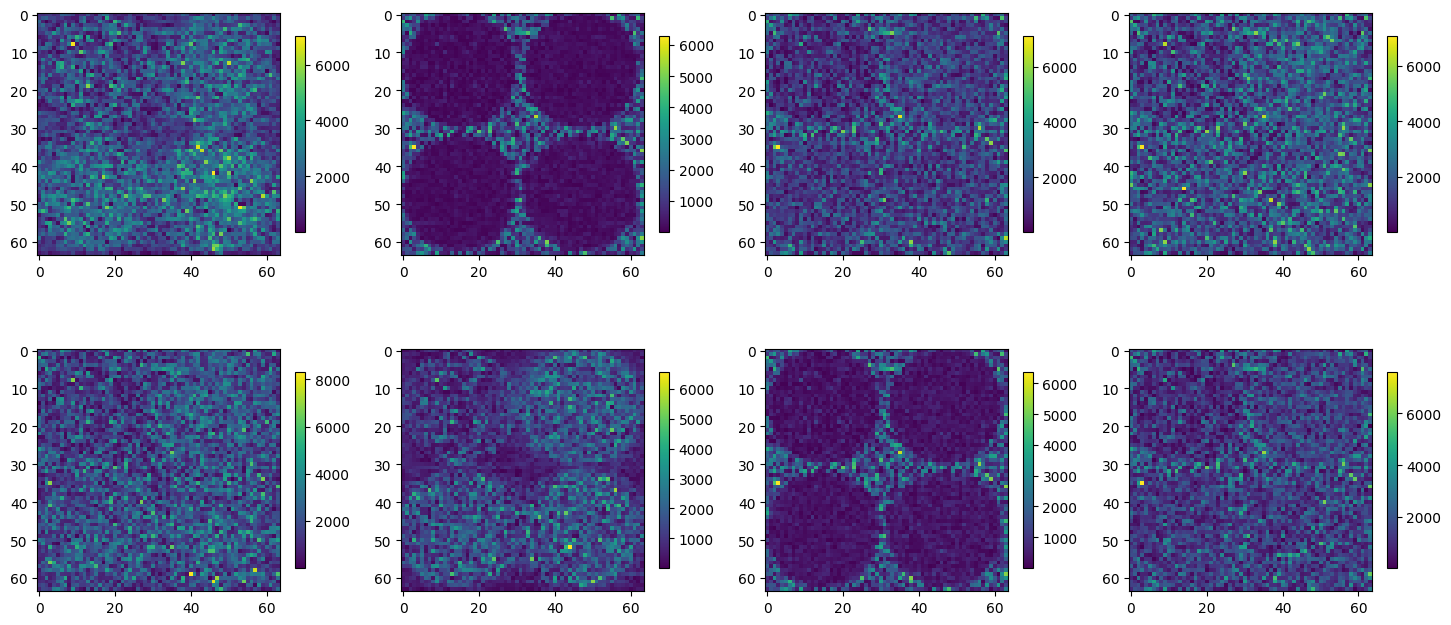

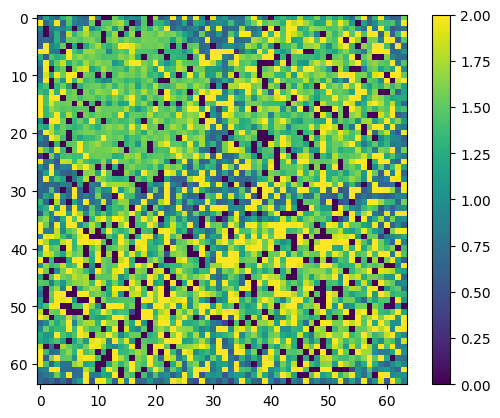

In [6]:
MOLLI_readout_img=[]
MOLLI_readout_t = np.array( [200, 1200, 2200, 3200, 4200, 300, 1300, 2300]) * 1e-3
for i in range(8):
    MOLLI_readout_img.append(load_img(
        "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA35_FOV256_K64_thick8_center_first", i))
        # "../img_MOLLI/Phantom_MOLLI_533_TR2.8_FA10_FOV320_K64_center_first", i))
MOLLI_readout_img = np.asarray(MOLLI_readout_img)

# print(MOLLI_readout_img[:, 15, 15])

plt.figure(figsize=(18,8))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(MOLLI_readout_img[i])
    plt.colorbar(shrink=0.7)

T1_result = np.zeros(MOLLI_readout_img[0].shape)

for x, y in tqdm(np.ndindex(MOLLI_readout_img[0].shape)):
    # T1_star, T1, A, B = MAGIR(
    T1_star, T1, A, B = MF_MAGIR(
        MOLLI_readout_t, MOLLI_readout_img[:, x, y])
    T1_result[x, y] = T1

print(T1_result)

plt.figure()
plt.imshow(T1_result)
plt.colorbar()
plt.clim(0,2)